# Project: Soccer  Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ques">Questions</a></li>
    <li><a href="#wranglingGathering1">Data Wrangling Gathering Data Question 1,2</a></li>
    <li><a href="#wranglingGathering2">Data Wrangling Gathering Data Question 3</a></li>

<li><a href="#wranglingasscle1">Data Wrangling Assessing And Cleaning Data for Q1,Q2</a></li>
<li><a href="#wranglingasscle2">Data Wrangling Assessing And Cleaning Data for Q3</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#edaq">Exploratory Data Analysis Question 1,2</a></li>

<li><a href="#edaq1">Exploratory Data Analysis Question 1</a></li>
    <li><a href="#info">Information about virsualization</a></li>

<li><a href="#edaq2">Exploratory Data Analysis Question 2</a></li>
<li><a href="#edaq3">Exploratory Data Analysis Question 3</a></li>

<li><a href="#conclusions">Conclusions</a></li>
  <li><a href="#chall">Challenges</a></li>

 <li><a href="#res">Resourses</a></li>

</ul>

<a id='intro'></a>
## Introduction

> **Tip**:I used Soccer database to analyze the data inside. Inside the database there is a table called Team Attribute. We will use the task in this table because it helps me to analyze the data.

> I will ask some questions to make sure that the existing data is sufficient, or do I need to perform operations in the existing data to be ready:



<a id='ques'></a>
## Questions

> Question1:
> Does age affect the speed of players?

>Question2:
> Which player speed had  most lucky penalties?

>Question3:
>Which League scored the most home goals in each league in 2008?

In [169]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
today = datetime.today()


<a id='wranglingGathering1'></a>
## Data Wrangling
>Data Wrangling Gathering Data Question 1,2

In [170]:
conn = sqlite3.connect('database.sqlite')
df_one= pd.read_sql_query ('''
                               SELECT   p.player_api_id, player_name,sprint_speed, birthday, height,weight,penalties,date
                        FROM player_attributes pa JOIN
                        player p ON pa.player_api_id = p.player_api_id
                         
                               ''', conn)
df_one.head(20)

player_api_id         player_name  sprint_speed             birthday  \
0          505942  Aaron Appindangoye          64.0  1992-02-29 00:00:00   
1          505942  Aaron Appindangoye          64.0  1992-02-29 00:00:00   
2          505942  Aaron Appindangoye          64.0  1992-02-29 00:00:00   
3          505942  Aaron Appindangoye          64.0  1992-02-29 00:00:00   
4          505942  Aaron Appindangoye          64.0  1992-02-29 00:00:00   
5          155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
6          155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
7          155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
8          155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
9          155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
10         155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
11         155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
12         155782     Aaron Cresswell          78.0  1989-12-15 00:00:00   
13         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
14         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
15         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
16         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
17         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
18         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   
19         155782     Aaron Cresswell          82.0  1989-12-15 00:00:00   

    height  weight  penalties                 date  
0   182.88     187       48.0  2016-02-18 00:00:00  
1   182.88     187       48.0  2015-11-19 00:00:00  
2   182.88     187       48.0  2015-09-21 00:00:00  
3   182.88     187       47.0  2015-03-20 00:00:00  
4   182.88     187       47.0  2007-02-22 00:00:00  
5   170.18     146       59.0  2016-04-21 00:00:00  
6   170.18     146       59.0  2016-04-07 00:00:00  
7   170.18     146       59.0  2016-01-07 00:00:00  
8   170.18     146       59.0  2015-12-24 00:00:00  
9   170.18     146       59.0  2015-12-17 00:00:00  
10  170.18     146       59.0  2015-10-16 00:00:00  
11  170.18     146       59.0  2015-09-25 00:00:00  
12  170.18     146       59.0  2015-09-21 00:00:00  
13  170.18     146       58.0  2015-01-09 00:00:00  
14  170.18     146       58.0  2014-12-05 00:00:00  
15  170.18     146       58.0  2014-11-07 00:00:00  
16  170.18     146       58.0  2014-09-18 00:00:00  
17  170.18     146       58.0  2014-05-02 00:00:00  
18  170.18     146       58.0  2014-04-04 00:00:00  
19  170.18     146       58.0  2014-03-14 00:00:00

<a id='wranglingGathering2'></a>
## Data Wrangling
>Data Wrangling Gathering Data Question 3

In [171]:
df_two= pd.read_sql_query ('''
                               SELECT l.country_id,name,season,date,home_team_api_id,home_team_goal
                        FROM Match Ma JOIN
                        League l ON Ma.country_id=l.country_id
                          WHERE date BETWEEN '2008-01-01 00:00:00' AND '2008-12-31 23:59:59' ;
                               ''', conn)
df_two.head(20)

country_id                    name     season                 date  \
0            1  Belgium Jupiler League  2008/2009  2008-08-17 00:00:00   
1            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
2            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
3            1  Belgium Jupiler League  2008/2009  2008-08-17 00:00:00   
4            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
5            1  Belgium Jupiler League  2008/2009  2008-09-24 00:00:00   
6            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
7            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
8            1  Belgium Jupiler League  2008/2009  2008-08-16 00:00:00   
9            1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
10           1  Belgium Jupiler League  2008/2009  2008-10-31 00:00:00   
11           1  Belgium Jupiler League  2008/2009  2008-11-02 00:00:00   
12           1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
13           1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
14           1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
15           1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
16           1  Belgium Jupiler League  2008/2009  2008-11-01 00:00:00   
17           1  Belgium Jupiler League  2008/2009  2008-11-02 00:00:00   
18           1  Belgium Jupiler League  2008/2009  2008-11-08 00:00:00   
19           1  Belgium Jupiler League  2008/2009  2008-11-08 00:00:00   

    home_team_api_id  home_team_goal  
0               9987               1  
1              10000               0  
2               9984               0  
3               9991               5  
4               7947               1  
5               8203               1  
6               9999               2  
7               4049               1  
8              10001               1  
9               8342               4  
10              9985               1  
11             10000               0  
12              9994               0  
13              7947               2  
14              8203               1  
15              9996               0  
16              4049               1  
17              9993               1  
18              8635               2  
19              9998               0

<a id='wranglingasscle1'></a>
## Data Wrangling
>Assessing and Cleaning Data

>For Question 1 and 2

> in this Data Set we have 

>1. missing value in columns(sprint_speed,penalties) 

>2. duplicating Rows

> And I should do some changing data Types like birthday to dateTime to calculate age of player


In [172]:
#Checking Missing value
df_one.isna().sum()


player_api_id      0
player_name        0
sprint_speed     836
birthday           0
height             0
weight             0
penalties        836
date               0
dtype: int64

In [173]:
df_one.shape

(183978, 8)

In [174]:
df_one.fillna(method='ffill',inplace=True)


In [175]:
#checking Duplicating
df_one['player_api_id'].duplicated().sum()

172918

In [176]:
df_one.drop_duplicates(subset ='player_api_id' ,inplace=True)

In [177]:
#checking for Data types
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_api_id  11060 non-null  int64  
 1   player_name    11060 non-null  object 
 2   sprint_speed   11060 non-null  float64
 3   birthday       11060 non-null  object 
 4   height         11060 non-null  float64
 5   weight         11060 non-null  int64  
 6   penalties      11060 non-null  float64
 7   date           11060 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 777.7+ KB


In [178]:
#convert birthDay to datetime
df_one['birthday'] = pd.to_datetime(df_one['birthday'])
df_one['date'] = pd.to_datetime(df_one['date'])
# caluclate Age for every date because I need it for my Question
df_one['age'] = df_one['birthday'].apply(lambda x: (today - x).days // 365)

In [179]:
df_one.head(20)

player_api_id            player_name  sprint_speed   birthday  height  \
0           505942     Aaron Appindangoye          64.0 1992-02-29  182.88   
5           155782        Aaron Cresswell          78.0 1989-12-15  170.18   
38          162549            Aaron Doran          74.0 1991-05-13  170.18   
64           30572          Aaron Galindo          34.0 1982-05-08  182.88   
87           23780           Aaron Hughes          31.0 1979-11-08  182.88   
112          27316             Aaron Hunt          69.0 1986-09-04  182.88   
139         564793             Aaron Kuhl          67.0 1996-01-30  172.72   
146          30895           Aaron Lennon          89.0 1987-04-16  165.10   
172         528212           Aaron Lennox          26.0 1993-02-19  190.50   
179         101042          Aaron Meijers          77.0 1987-10-28  175.26   
198          23889          Aaron Mokoena          67.0 1980-11-25  182.88   
206         231592             Aaron Mooy          71.0 1990-09-15  175.26   
234         163222         Aaron Muirhead          69.0 1990-08-30  187.96   
242          40719           Aaron Niguez          78.0 1989-04-26  170.18   
269          75489           Aaron Ramsey          69.0 1990-12-26  177.80   
309         597948          Aaron Splaine          66.0 1996-10-13  172.72   
317         161644  Aaron Taylor-Sinclair          74.0 1991-04-08  182.88   
335          23499        Aaron Wilbraham          53.0 1979-10-21  190.50   
357         120919      Aatif Chahechouhe          77.0 1986-07-02  175.26   
373          46447              Abasse Ba          61.0 1976-07-12  187.96   

     weight  penalties       date  age  
0       187       48.0 2016-02-18   30  
5       146       59.0 2016-04-21   33  
38      163       61.0 2016-01-07   31  
64      198       37.0 2016-04-21   40  
87      154       45.0 2015-12-24   43  
112     161       81.0 2016-04-28   36  
139     146       42.0 2016-04-21   27  
146     139       62.0 2015-10-16   35  
172     181       41.0 2016-02-25   30  
179     170       56.0 2015-12-03   35  
198     181       34.0 2012-02-22   42  
206     150       73.0 2016-02-04   32  
234     168       74.0 2014-09-18   32  
242     143       67.0 2016-04-28   33  
269     154       75.0 2016-03-10   32  
309     163       55.0 2016-04-14   26  
317     176       40.0 2016-04-28   31  
335     159       73.0 2016-04-21   43  
357     150       85.0 2016-05-12   36  
373     185       39.0 2010-08-30   46

In [180]:
df_one['penalties'] = df_one['penalties'].astype('int')
df_one['sprint_speed'] = df_one['sprint_speed'].astype('int')
df_one['height'] = df_one['height'].astype('int')
df_one.dtypes

player_api_id             int64
player_name              object
sprint_speed              int32
birthday         datetime64[ns]
height                    int32
weight                    int64
penalties                 int32
date             datetime64[ns]
age                       int64
dtype: object

<a id='wranglingasscle2'></a>
## Data Wrangling
>Assessing and Cleaning Data

>For Question 3

> in this data I should do some changing data types of date to use it to answer question 3

In [181]:
#Checking Missing value
df_two.isna().sum()

country_id          0
name                0
season              0
date                0
home_team_api_id    0
home_team_goal      0
dtype: int64

In [182]:
df_two.shape

(1613, 6)

In [183]:
#checking Duplicating
df_two.duplicated().sum()

0

In [184]:
df_two.dtypes

country_id           int64
name                object
season              object
date                object
home_team_api_id     int64
home_team_goal       int64
dtype: object

In [185]:
df_two['date'] = pd.to_datetime(df_two['date'])
df_two.head(30)

country_id                    name     season       date  \
0            1  Belgium Jupiler League  2008/2009 2008-08-17   
1            1  Belgium Jupiler League  2008/2009 2008-08-16   
2            1  Belgium Jupiler League  2008/2009 2008-08-16   
3            1  Belgium Jupiler League  2008/2009 2008-08-17   
4            1  Belgium Jupiler League  2008/2009 2008-08-16   
5            1  Belgium Jupiler League  2008/2009 2008-09-24   
6            1  Belgium Jupiler League  2008/2009 2008-08-16   
7            1  Belgium Jupiler League  2008/2009 2008-08-16   
8            1  Belgium Jupiler League  2008/2009 2008-08-16   
9            1  Belgium Jupiler League  2008/2009 2008-11-01   
10           1  Belgium Jupiler League  2008/2009 2008-10-31   
11           1  Belgium Jupiler League  2008/2009 2008-11-02   
12           1  Belgium Jupiler League  2008/2009 2008-11-01   
13           1  Belgium Jupiler League  2008/2009 2008-11-01   
14           1  Belgium Jupiler League  2008/2009 2008-11-01   
15           1  Belgium Jupiler League  2008/2009 2008-11-01   
16           1  Belgium Jupiler League  2008/2009 2008-11-01   
17           1  Belgium Jupiler League  2008/2009 2008-11-02   
18           1  Belgium Jupiler League  2008/2009 2008-11-08   
19           1  Belgium Jupiler League  2008/2009 2008-11-08   
20           1  Belgium Jupiler League  2008/2009 2008-11-09   
21           1  Belgium Jupiler League  2008/2009 2008-11-07   
22           1  Belgium Jupiler League  2008/2009 2008-11-08   
23           1  Belgium Jupiler League  2008/2009 2008-11-08   
24           1  Belgium Jupiler League  2008/2009 2008-11-08   
25           1  Belgium Jupiler League  2008/2009 2008-11-08   
26           1  Belgium Jupiler League  2008/2009 2008-11-09   
27           1  Belgium Jupiler League  2008/2009 2008-11-16   
28           1  Belgium Jupiler League  2008/2009 2008-11-15   
29           1  Belgium Jupiler League  2008/2009 2008-11-15   

    home_team_api_id  home_team_goal  
0               9987               1  
1              10000               0  
2               9984               0  
3               9991               5  
4               7947               1  
5               8203               1  
6               9999               2  
7               4049               1  
8              10001               1  
9               8342               4  
10              9985               1  
11             10000               0  
12              9994               0  
13              7947               2  
14              8203               1  
15              9996               0  
16              4049               1  
17              9993               1  
18              8635               2  
19              9998               0  
20              9986               2  
21              9984               2  
22              9991               1  
23              9999               1  
24              8571               0  
25             10001               1  
26              9993               1  
27              8342               1  
28              9987               1  
29             10000               2

<a id='eda'></a>
## Exploratory Data Analysis :

>In this step, after making sure that the existing data helps me in solving the questions posed.

>First I write A Function to be ready to use in every Question
 

In [186]:
#displot function
def displot_char(data,title_name):
    plot = sns.distplot(data)
    plt.title(title_name)
    plt.show()

In [187]:
# bar chart function
def bar_chart(x_axis,y_axis,title_name,x_axis_name,y_axis_name):
    plt.bar(x_axis, y_axis)
    plt.title(title_name)
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    plt.xticks(rotation=90)
    plt.show()

In [188]:
# histgram function
def hist_plot_by(x, xlabel, ylabel):
    ax = plt.subplot(1,1,1)
    ax.hist(x)
    plt.title('Histgram')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

In [189]:
#violing function 
def violingrid(x, y, **kwargs):
    ax = sns.violinplot(x=x, y=y, color='b', inner='quartile')
    ax.tick_params(rotation=90)


In [190]:
#scatter_char function
def scatter_char(x_column,y_column,color,x_label,y_label):
    plt.scatter(x_column, y_column, c=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()
    


In [191]:
# box_plot function
def box_plot(data_set,xcolumn,ycolumn,color):
    bp = data_set.boxplot(column=[xcolumn,ycolumn],color=color)
    plt.show()


<a id='edaq1'></a>
## Exploratory Data Analysis: Question 1
> Does age affect the speed of players?

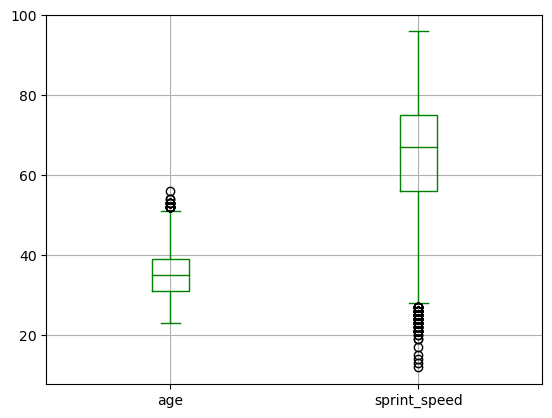

In [192]:
box_plot(df_one,'age','sprint_speed','green')

<a id=info></a>
 >We note that the age group is between 30 and 40
 
 >As for the speed of the players between 55 and 75

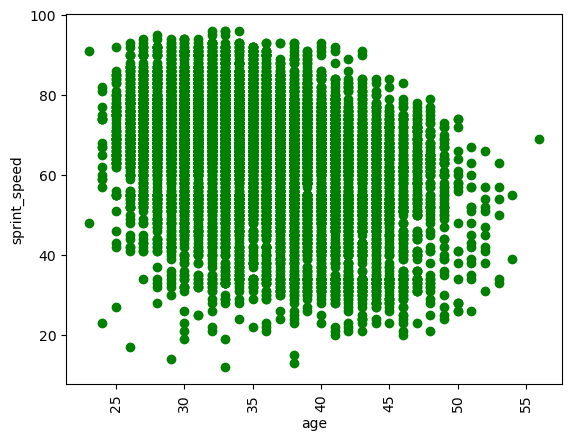

In [193]:
scatter_char(df_one['age'],df_one['sprint_speed'],"green",'age','sprint_speed')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


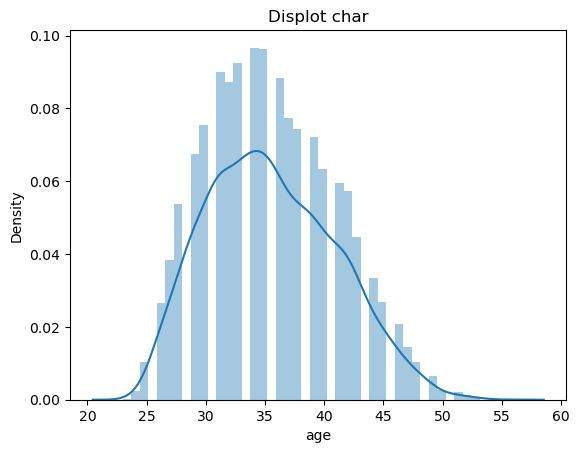

In [196]:
displot_char(df_one['age'],'Displot char')

<a id='info'></a>
>We note in this drawing that the average age of the players is 35

>There are no players under the age of 20 or over 55

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


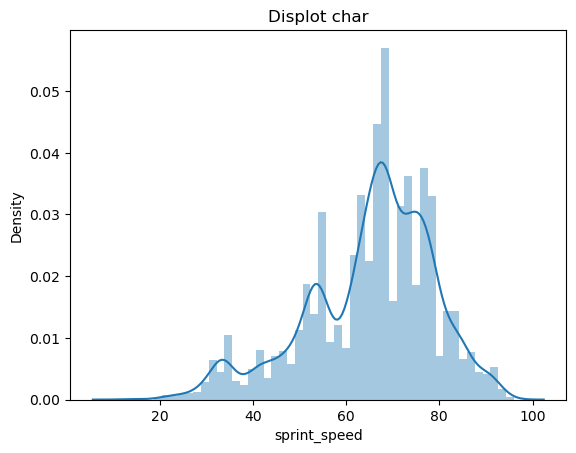

In [197]:
displot_char(df_one['sprint_speed'],'Displot char')

<a id='info'></a>
>Here we find in this drawing that the average speed of the players is approximately 70.

>No player has a speed of 95 or more

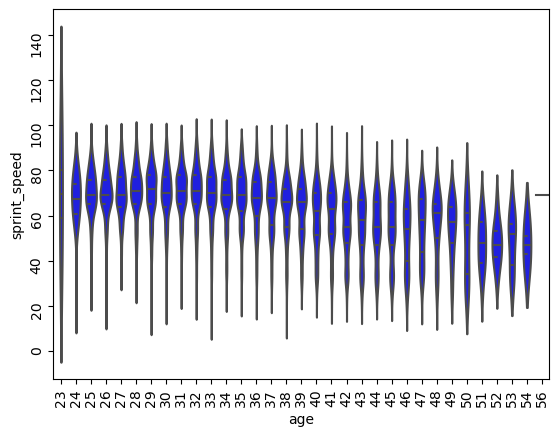

In [198]:
violingrid(df_one['age'],df_one['sprint_speed'])

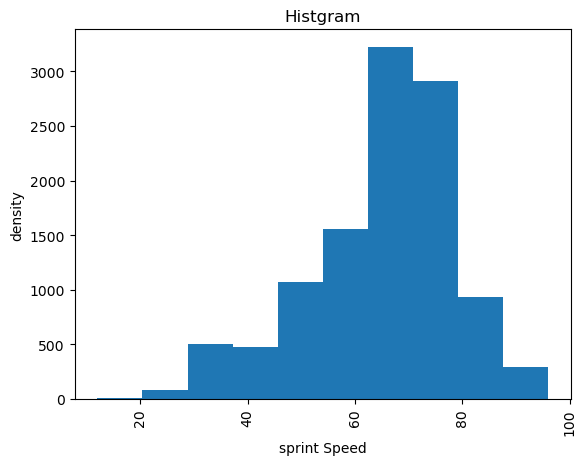

In [199]:
hist_plot_by(df_one['sprint_speed'],'sprint Speed','density')

<a id='info'></a>
> In this figure, we find that most of the players present range from 60 to 80.

>The difference between this category and the other categories is very large.

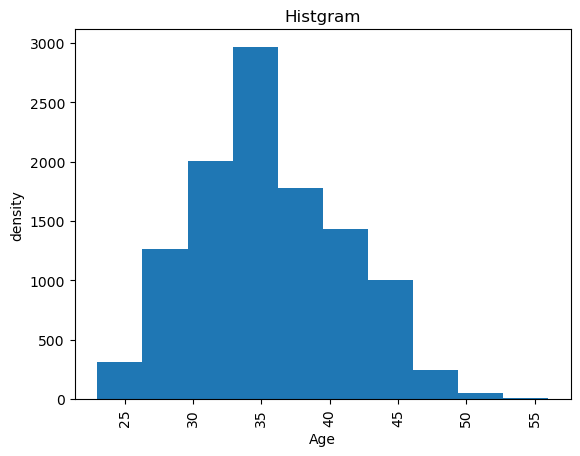

In [200]:
hist_plot_by(df_one['age'],'Age','density')

<a id='info'></a>
>We find that most of the players are between the ages of about 35 and it is strange that there is a group whose ages range from 40 to 50, and this is somewhat strange.

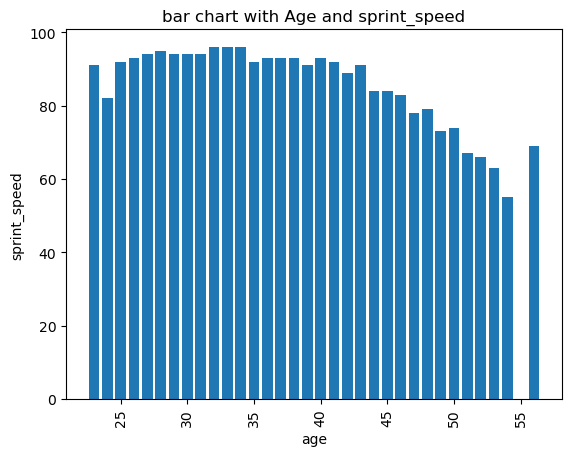

In [201]:
bar_chart(df_one['age'],df_one['sprint_speed'],'bar chart with Age and sprint_speed','age','sprint_speed')

<a id='info'></a>
>In this statistic, between the player's speed and his age, we find what has been shown to us before that the fastest among the players are those whose ages range from 32 to 35, and this is more accurate in age than previously.

<a id='edaq2'></a>
## Exploratory Data Analysis: Question 2
> Which players had the most penalties?

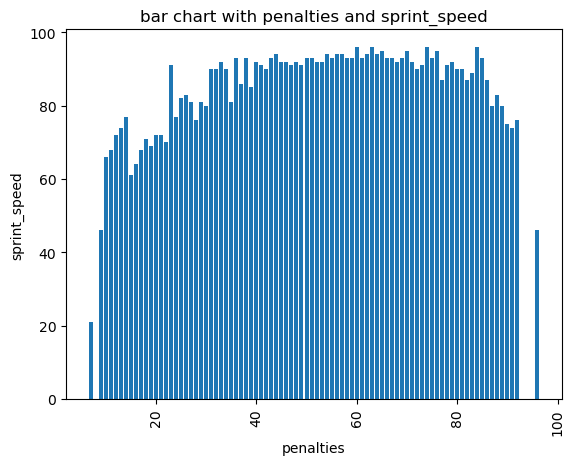

In [202]:
bar_chart(df_one['penalties'],df_one['sprint_speed'],'bar chart with penalties and sprint_speed','penalties','sprint_speed')

<a id='info'></a>
>We note that most of the players took penalty kicks with a speed between 80 and 85.
    
>But there are faster players but less penalty kicks.

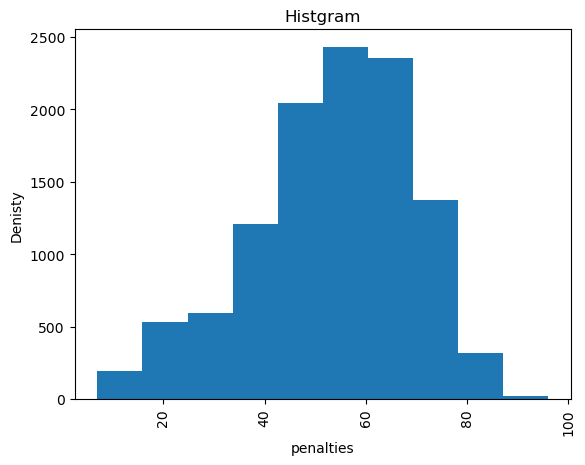

In [203]:
hist_plot_by(df_one['penalties'],"penalties",'Denisty')

<a id='info'></a>
>The average penalty taker is between 50 and 70, which is the most common category.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


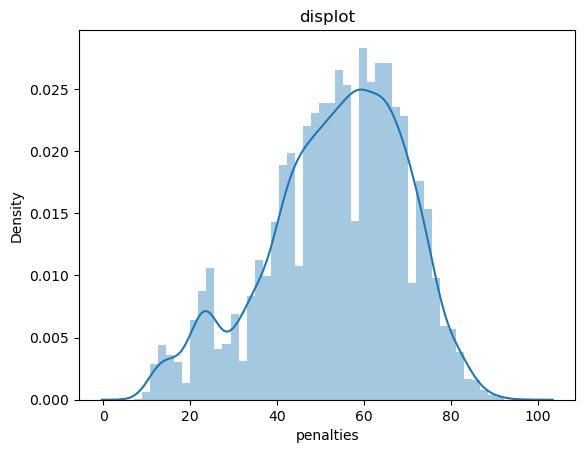

In [204]:
displot_char(df_one['penalties'],'displot')

<a id='info'></a>
>The average penalty kick taken among players is 60 penalties.

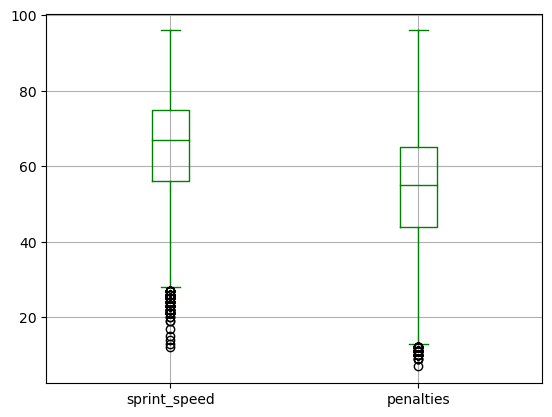

In [205]:
box_plot(df_one,'sprint_speed','penalties','green')

<a id=info></a>
 >We note that the player had penaltes group is between 50 and 70
 
 >As for the speed of the players between 55 and 75

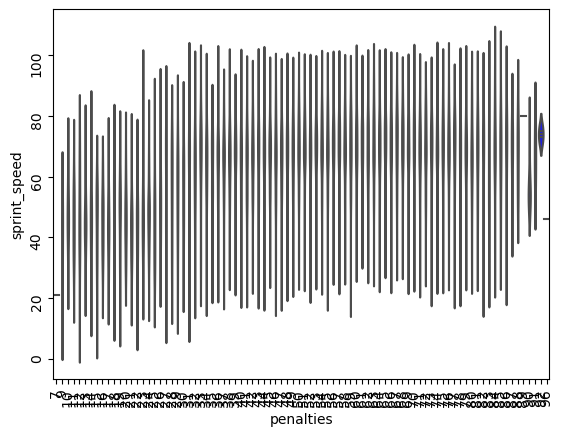

In [206]:
violingrid(df_one['penalties'],df_one['sprint_speed'])

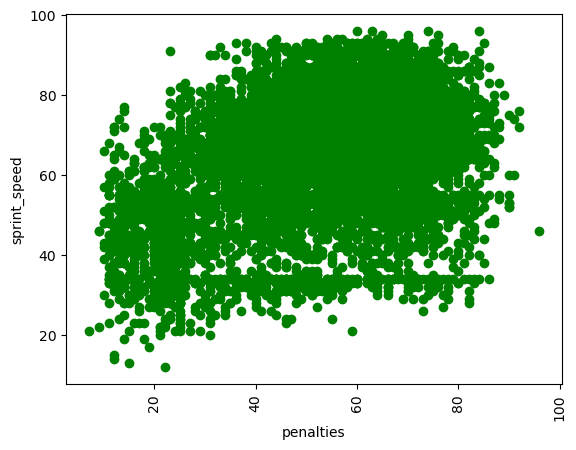

In [207]:
scatter_char(df_one['penalties'],df_one['sprint_speed'],"green",'penalties','sprint_speed')

<a id='edaq3'></a>
## Exploratory Data Analysis: Question 3
>Which League scored the most home goals in each league in 2008?

In [208]:
df_two['total_goals'] = df_two['home_team_goal']

df_two.head()

country_id                    name     season       date  home_team_api_id  \
0           1  Belgium Jupiler League  2008/2009 2008-08-17              9987   
1           1  Belgium Jupiler League  2008/2009 2008-08-16             10000   
2           1  Belgium Jupiler League  2008/2009 2008-08-16              9984   
3           1  Belgium Jupiler League  2008/2009 2008-08-17              9991   
4           1  Belgium Jupiler League  2008/2009 2008-08-16              7947   

   home_team_goal  total_goals  
0               1            1  
1               0            0  
2               0            0  
3               5            5  
4               1            1

In [209]:
group_by = df_two.groupby(['country_id','name','season'])
total_group = group_by['total_goals'].agg(np.sum)
total_group

country_id  name                      season   
1           Belgium Jupiler League    2008/2009    262
1729        England Premier League    2008/2009    272
4769        France Ligue 1            2008/2009    239
7809        Germany 1. Bundesliga     2008/2009    272
10257       Italy Serie A             2008/2009    262
13274       Netherlands Eredivisie    2008/2009    291
15722       Poland Ekstraklasa        2008/2009    184
17642       Portugal Liga ZON Sagres  2008/2009    110
19694       Scotland Premier League   2008/2009    163
21518       Spain LIGA BBVA           2008/2009    272
24558       Switzerland Super League  2008/2009    142
Name: total_goals, dtype: int64

In [210]:
df = total_group.to_frame().reset_index()
df['name']= df['name'].str.split(' ').str[0]

df.head()

country_id     name     season  total_goals
0           1  Belgium  2008/2009          262
1        1729  England  2008/2009          272
2        4769   France  2008/2009          239
3        7809  Germany  2008/2009          272
4       10257    Italy  2008/2009          262

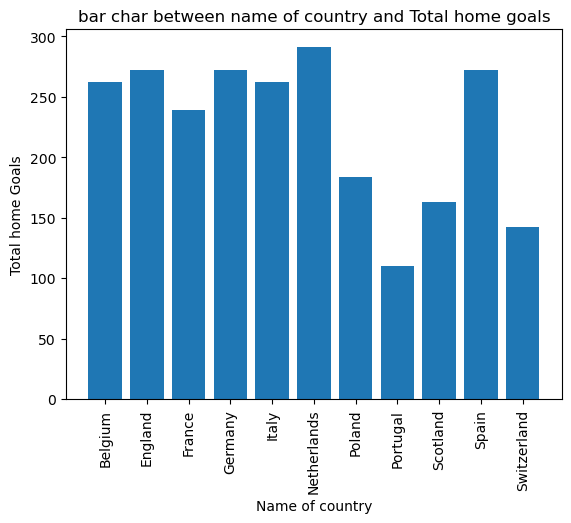

In [211]:
bar_chart(df['name'],df['total_goals'],'bar char between name of country and Total home goals','Name of country','Total home Goals')

<a id='info'></a>
>Here we find that the Netherlands League, the most scoring leagues at home.

>As for the least teams, it is the Portuguese League.

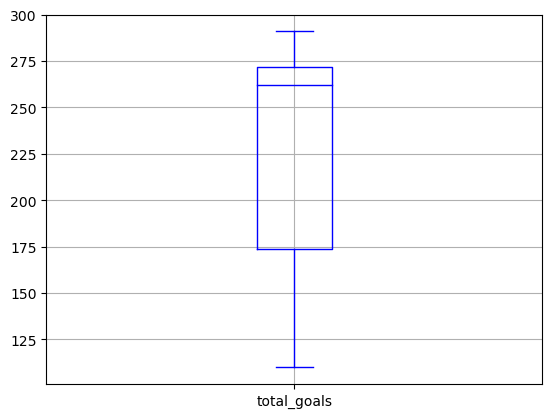

In [212]:
bp = df.boxplot(column=['total_goals'],color='blue')
plt.show()

<a id='info'></a>
>The total goals of the leagues in their stadium are limited to between 175 and 275 goals per season.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


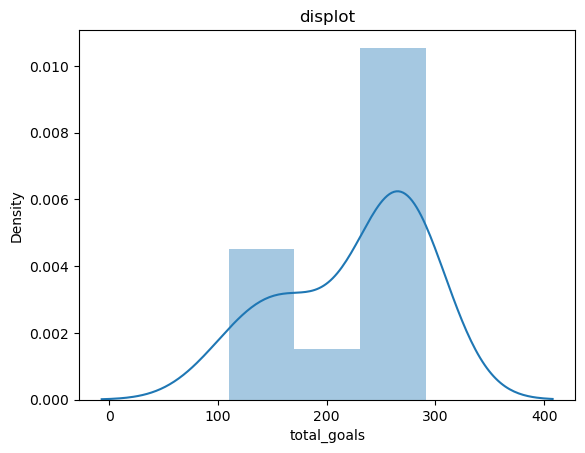

In [213]:
displot_char(df['total_goals'],'displot')

<a id='info'></a>
>We find here that the average goals equal to 250 goals in the team's stadium

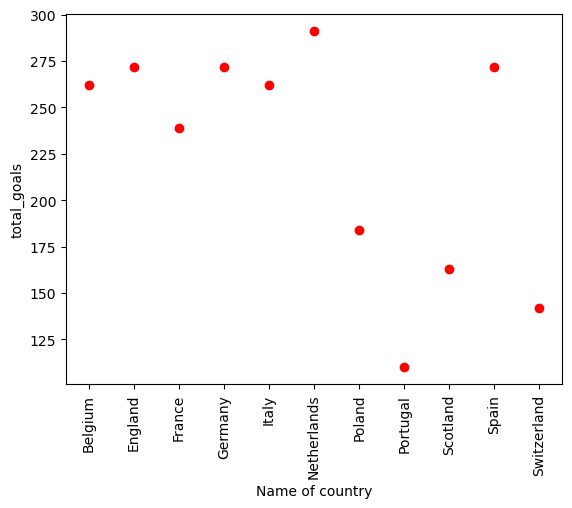

In [214]:
scatter_char(df['name'],df['total_goals'],'red','Name of country','total_goals')

<a id='info'></a>
>In this drawing, we can divide the result into two groups.
    
>The first group contains the most goals-scoring tournaments, headed by the Netherlands League, followed by the Spain ,German, English, Belgian, Italian and French, and there is no significant difference between the leagues.

>The second group, which is Portugal, is the least in scoring goals, then Switzerland ,scotland and poland league.

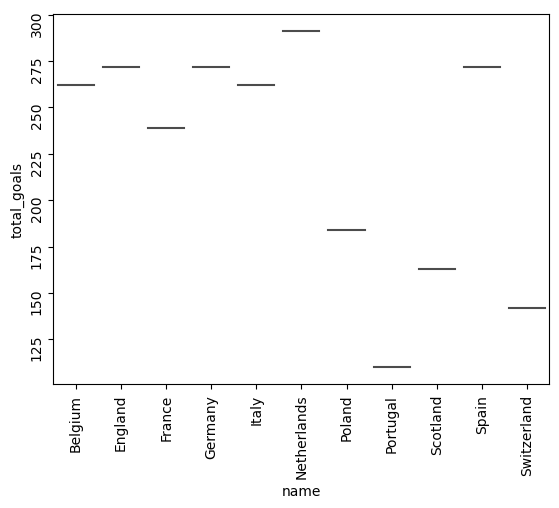

In [215]:
violingrid(df['name'],df['total_goals'])

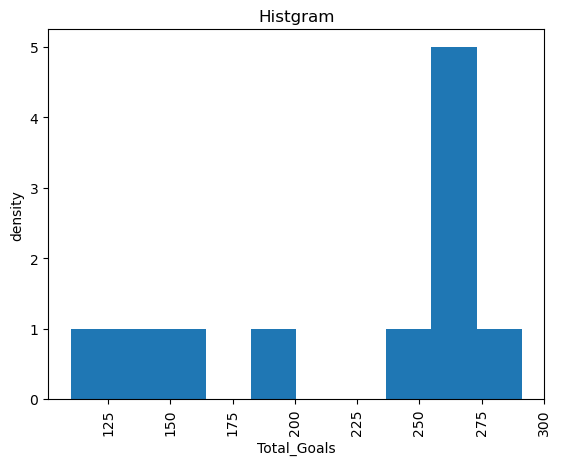

In [216]:
hist_plot_by(df['total_goals'],'Total_Goals','density')

<a id='info'></a>
>In this figure it is clear that there is no league scored between 160 to 180 and 200 to 240.
>The average goal score ranged from 255 to 275.

<a id='conclusions'></a>
## Conclusions
>In this project there are a number of important conclusions, each question raised led to a different vision in the analysis.

> In Question 1:
The first question explained to us something very important, which is that the age of any soccer player affects his speed if he increases in age. As shown in the graphics, the speed of the players whose age is between (20 and 35) and there is no big difference, and when the player’s age exceeds 35, his speed decreases significantly.

> In Question 2:
 (Does speed have a role in the player's victory over taking a penalty kick) it was explained to us the following that there is no definite relationship.
The player who took the largest number of penalty kicks does not have more speed, and there are players who have more speed and won fewer penalties than him.

>In Question 3:
What is the league that scored the most goals at home in 2008 to know what is the league that has a strong air force on its stadium, a great competitive environment and a large audience, and the result was the Netherlands league, unlike the Portuguese league, which has the fewest goals in the group.Although we have seen that Dutch football scores more goals per game every season, we cannot conclude anything about the statistical significance of this phenomenon. Because we only used one season, 2008.

<a id='chall'></a>
## Challenges
One of the most difficult difficulties I encountered is the preparation of the data set in answering the questions.
in the beginning
1. The date of birthdays had to be converted to an age. First, the date had to be converted from an object to dateTime, and then converted to an age. It took me a lot of time to research and work.
2. At the beginning of the project, when loading data from data base to pandas, it took a lot of time to write the commands (SQL) in order to be ready for the second step.

>In Assessing and cleaning data, I did not encounter any difficulties, because this step was practiced a lot in the classroom.

<a id='res'></a>
## Resources
### Stack overflow
### pandas DataFrame plot 
https://pandas.pydata.org/pandas-docs/stable/index.html